## Florida COVID-19 Case Line Data Analysis
**Last Updated Decemeber 12, 2020**

**Import Python Libraries**

In [1]:
from datetime import date,datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

**Read CSV File**

In [2]:
#Source: Florida COVID19 Case Line Data- https://open-fdoh.hub.arcgis.com/datasets/florida-covid19-case-line-data
df= pd.read_csv("C:/Users/amsim/python/Florida_COVID19_Case_Line_Data121220.csv")

**Summary of the DataFrame**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116973 entries, 0 to 1116972
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   County          1116973 non-null  object 
 1   Age             1115823 non-null  float64
 2   Age_group       1116973 non-null  object 
 3   Gender          1116973 non-null  object 
 4   Jurisdiction    1116973 non-null  object 
 5   Travel_related  1116973 non-null  object 
 6   Origin          25760 non-null    object 
 7   EDvisit         1071636 non-null  object 
 8   Hospitalized    1104450 non-null  object 
 9   Died            20049 non-null    object 
 10  Case_           1116971 non-null  object 
 11  Contact         891891 non-null   object 
 12  Case1           1116973 non-null  object 
 13  EventDate       1116973 non-null  object 
 14  ChartDate       1116973 non-null  object 
 15  ObjectId        1116973 non-null  int64  
dtypes: float64(1), int64(1), object(14)


**General Descriptive Statistics**

In [4]:
df.describe()

,Age,ObjectId
count,1.115823e+06,1.116973e+06
mean,4.184724e+01,5.584870e+05
std,2.035963e+01,3.224425e+05
min,0.000000e+00,1.000000e+00
25%,2.600000e+01,2.792440e+05
50%,4.000000e+01,5.584870e+05
75%,5.600000e+01,8.377300e+05
max,1.100000e+02,1.116973e+06


**View the DataFrame**

In [5]:
df

,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Volusia,50.0,45-54 years,Female,FL resident,No,NaN,UNKNOWN,NO,NaN,Yes,Yes,2020/08/25 05:00:00+00,2020/08/24 00:00:00+00,2020/08/25 05:00:00+00,1
1,Walton,28.0,25-34 years,Male,FL resident,No,NaN,NO,NO,NaN,Yes,NO,2020/11/18 05:00:00+00,2020/11/15 00:00:00+00,2020/11/18 05:00:00+00,2
2,Hillsborough,5.0,5-14 years,Male,FL resident,No,NaN,UNKNOWN,UNKNOWN,NaN,Yes,UNKNOWN,2020/08/04 05:00:00+00,2020/08/04 17:43:34+00,2020/08/04 05:00:00+00,3
3,Collier,91.0,85+ years,Male,FL resident,Unknown,NaN,YES,YES,Recent,Yes,NO,2020/11/18 05:00:00+00,2020/11/17 00:00:00+00,2020/11/18 05:00:00+00,4
4,Okaloosa,63.0,55-64 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,UNKNOWN,2020/08/04 05:00:00+00,2020/08/04 17:43:37+00,2020/08/04 05:00:00+00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116968,Unknown,19.0,15-24 years,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/09/10 05:00:00+00,2020/09/10 20:18:10+00,2020/09/10 05:00:00+00,1116969
1116969,Unknown,26.0,25-34 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/07/19 05:00:00+00,2020/07/19 14:48:52+00,2020/07/19 05:00:00+00,1116970
1116970,Unknown,81.0,75-84 years,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/08/11 05:00:00+00,2020/08/11 17:29:24+00,2020/08/11 05:00:00+00,1116971
1116971,Unknown,65.0,65-74 years,Male,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020/09/01 05:00:00+00,2020/09/01 20:57:07+00,2020/09/01 05:00:00+00,1116972


**Clean and Transform Data**

In [6]:
#Set the variable ObjectId as the index
df.set_index('ObjectId', inplace=True, drop=True)

In [7]:
#Remove columns that are not needed
df.drop(columns=['Age_group', 'Case_', 'EventDate', 'ChartDate'], inplace=True)

In [8]:
#Replace values for consistency and further processing
df['County'].replace('Unknown', np.NaN, inplace=True)
df['Died'].replace(['Recent'],'Yes', inplace=True)

In [9]:
#Create an 'Age_range' column 
cut_bins = [0, 4, 14, 24, 34, 44, 54, 64, 74, 84, 110] 
cut_labels = ['0-4 years', '5-14 years', '15-24 years', '25-34 years', '35-44 years',
            '45-54 years', '55-64 years', '65-74 years', '75-84 years', '85+ years']
df['Age_range'] = pd.cut(df['Age'], bins=cut_bins, right=True, labels=cut_labels, include_lowest=True)

In [10]:
#Create a 'Region' column
region_dictionary = {'Bay':1 , 'Calhoun':1, 'Escambia':1, 'Franklin':1, 'Gulf':1, 'Holmes':1, 'Jackson':1,'Liberty':1,
'Okaloosa':1, 'Santa Rosa':1, 'Walton':1, 'Washington':1,
'Alachua':2,  'Bradford':2, 'Citrus':2, 'Columbia':2, 'Dixie':2, 'Gadsden':2, 'Gilchrist':2, 'Hamilton':2, 
'Jefferson':2, 'Lafayette':2, 'Leon':2, 'Levy':2, 'Madison':2, 'Marion':2, 'Suwannee':2, 'Taylor':2, 'Union':2, 'Wakulla':2, 
'Baker':3, 'Clay':3, 'Duval':3, 'Nassau':3, 'Putnam':3, 'St. Johns':3,
'Brevard':4, 'Flagler':4, 'Lake':4, 'Orange':4,'Osceola':4, 'Seminole':4, 'Sumter':4, 'Volusia':4, 
'Desoto':5, 'Hardee':5, 'Hernando':5, 'Highlands':5, 'Hillsborough':5, 'Manatee':5, 'Pasco':5, 'Pinellas':5, 'Polk':5,'Sarasota':5, 
'Indian River':6, 'Martin':6, 'Okeechobee':6, 'Palm Beach':6, 'St. Lucie':6,
'Charlotte':7, 'Collier':7, 'Glades':7, 'Hendry':7, 'Lee':7,
'Broward':8,'Dade':8, 'Miami-Dade':8, 'Monroe':8}

df['Region'] = df['County'].map(region_dictionary)

In [11]:
#Convert variable(s) to datatime format
df['Case1'] = df['Case1'].apply(lambda x: pd.Timestamp(x).strftime('%Y-%m-%d') if not pd.isnull(x) else '')
df['Case1'] = df['Case1'].apply(pd.to_datetime)

#Convert the first character to uppercase and remaining to lowercase
df['EDvisit'] = df['EDvisit'].str.capitalize()
df['Hospitalized'] = df['Hospitalized'].str.capitalize()
df['Died'] = df['Died'].str.capitalize()
df['Contact'] = df['Contact'].str.capitalize()

#Replace all NaN elements with 'Unknown'
df.fillna({'ObjectId':'Unknown', 'Gender':'Unknown', 'Travel_related':'Unknown', 'Origin':'Unknown',
           'EDvisit':'Unknown', 'Hospitalized':'Unknown', 'Died':'Unknown', 'Contact':'Unknown'}, inplace=True)

**Summary of the Updated DataFrame**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1116973 entries, 1 to 1116973
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   County          1113852 non-null  object        
 1   Age             1115823 non-null  float64       
 2   Gender          1116973 non-null  object        
 3   Jurisdiction    1116973 non-null  object        
 4   Travel_related  1116973 non-null  object        
 5   Origin          1116973 non-null  object        
 6   EDvisit         1116973 non-null  object        
 7   Hospitalized    1116973 non-null  object        
 8   Died            1116973 non-null  object        
 9   Contact         1116973 non-null  object        
 10  Case1           1116973 non-null  datetime64[ns]
 11  Age_range       1115823 non-null  category      
 12  Region          1113852 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(9)
memory usage: 1

**View Updated DataFrame**

In [13]:
df.head(15)

,County,Age,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Contact,Case1,Age_range,Region
ObjectId,,,,,,,,,,,,,
1,Volusia,50.0,Female,FL resident,No,Unknown,Unknown,No,Unknown,Yes,2020-08-25,45-54 years,4.0
2,Walton,28.0,Male,FL resident,No,Unknown,No,No,Unknown,No,2020-11-18,25-34 years,1.0
3,Hillsborough,5.0,Male,FL resident,No,Unknown,Unknown,Unknown,Unknown,Unknown,2020-08-04,5-14 years,5.0
4,Collier,91.0,Male,FL resident,Unknown,Unknown,Yes,Yes,Yes,No,2020-11-18,85+ years,7.0
5,Okaloosa,63.0,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-08-04,55-64 years,1.0
6,Gulf,89.0,Female,FL resident,No,Unknown,No,No,Unknown,Yes,2020-11-18,85+ years,1.0
7,Hillsborough,68.0,Female,FL resident,No,Unknown,Unknown,Unknown,Unknown,Unknown,2020-08-04,65-74 years,5.0
8,Dade,2.0,Female,FL resident,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,2020-11-18,0-4 years,8.0
9,Dade,7.0,Male,FL resident,No,Unknown,No,No,Unknown,Yes,2020-11-18,5-14 years,8.0


**Data Visualization**

2020-03-02        2
2020-03-03        2
2020-03-04        4
2020-03-05        1
2020-03-07        4
              ...  
2020-12-07     8025
2020-12-08     9635
2020-12-09    11565
2020-12-10    11718
2020-12-11    10688
Name: Case1, Length: 284, dtype: int64


<IPython.core.display.Javascript object>


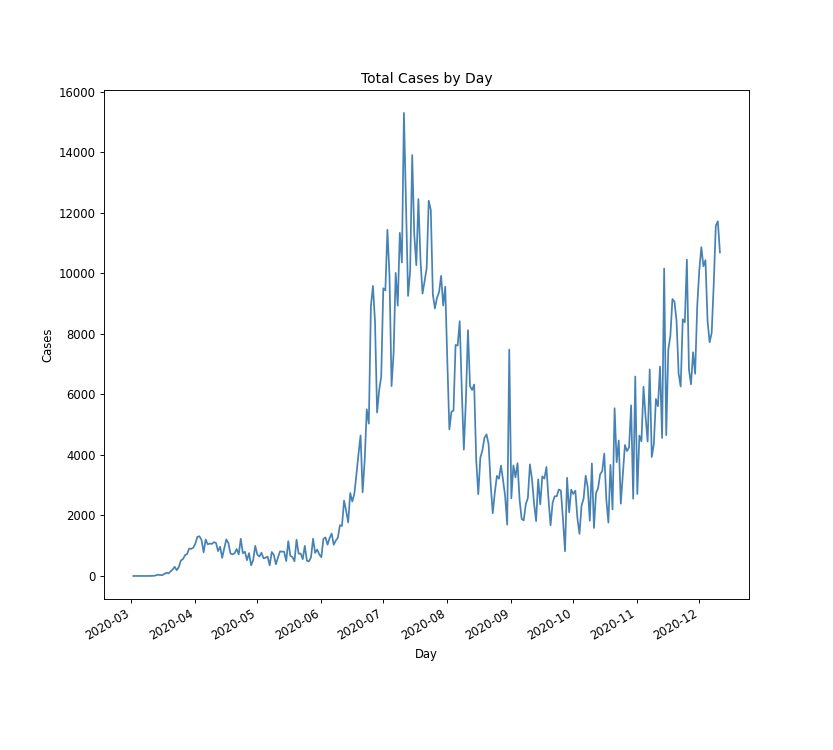

In [14]:
#Total Cases by Day
def cases_by_day():
    count_cases = df['Case1'].value_counts(sort=True)
    count_cases.sort_index(inplace=True)
    print(count_cases)

    count_cases.plot(kind='line', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Total Cases by Day')
    plt.show()

cases_by_day()


March          6829
April         27634
May           22095
June         102153
July         318620
August       150713
September     79671
October      100799
November     199039
December     109420
Name: Case1, dtype: int64


<IPython.core.display.Javascript object>


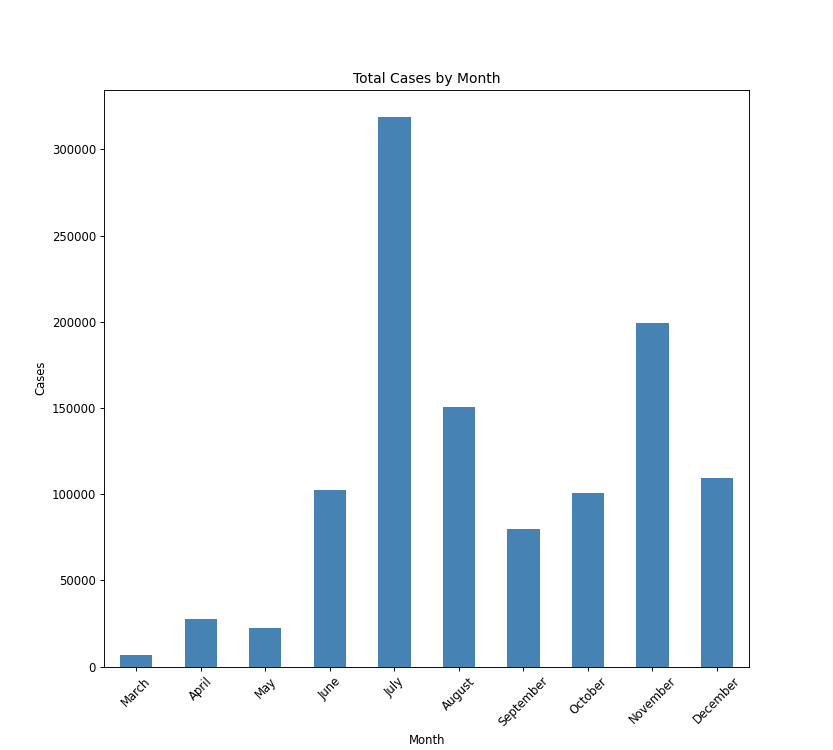

In [15]:
#Total Cases by Month
def cases_by_month():
    count_months = df['Case1'].dt.month.value_counts(ascending=True)
    count_months.sort_index(inplace=True)
    count_months.rename({1:"January", 2: "February", 3:"March", 4:"April", 5:"May", 6:"June",
                         7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace=True)
    print(count_months)
    
    count_months.plot(kind ='bar', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Month')
    plt.xticks(rotation=45)
    plt.ylabel('Cases')
    plt.title('Total Cases by Month')
    plt.show()
    
cases_by_month()

2020-03-02      2
2020-03-03      2
2020-03-04      4
2020-03-05      1
2020-03-07      4
2020-03-08      1
2020-03-09      5
2020-03-10      3
2020-03-11      6
2020-03-12      7
2020-03-13     24
2020-03-14     45
2020-03-15     33
2020-03-16     31
2020-03-17     70
2020-03-18    107
2020-03-19     87
2020-03-20    150
2020-03-21    217
2020-03-22    306
2020-03-23    193
2020-03-24    299
2020-03-25    515
2020-03-26    560
2020-03-27    689
2020-03-28    727
2020-03-29    908
2020-03-30    896
2020-03-31    937
Name: Case1, dtype: int64


<IPython.core.display.Javascript object>


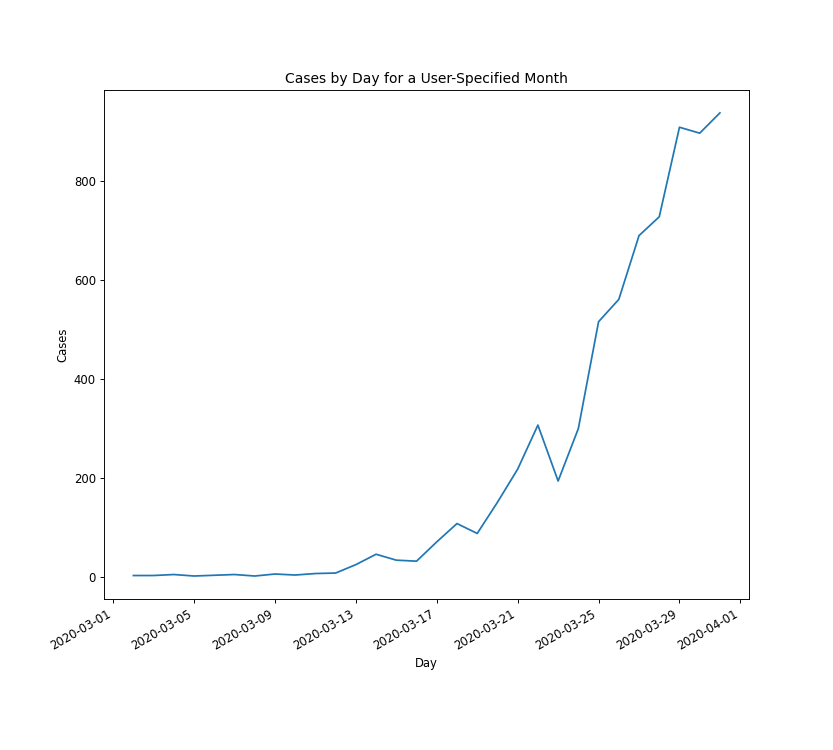

In [16]:
#This function returns the # of cases per day during a user-specified month.
#where March = 3, April = 4, May = 5, June = 6, July = 7, August = 8, September = 9, October = 10, Novemember = 11, December = 12
def cases_by_day_per_month(month):
    s = df['Case1']
    count_days = s.where(s.dt.month==month).value_counts(ascending=True)
    count_days.sort_index(inplace=True)
    print(count_days)
    
    count_days.plot(kind ='line',figsize=(10,9), legend=None)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Cases by Day for a User-Specified Month')
    plt.show()

cases_by_day_per_month(3)


2020-05-01     711
2020-05-02     641
2020-05-03     771
2020-05-04     587
2020-05-05     603
              ... 
2020-07-27    9191
2020-07-28    9376
2020-07-29    9916
2020-07-30    8934
2020-07-31    9557
Name: Case1, Length: 92, dtype: int64


<IPython.core.display.Javascript object>


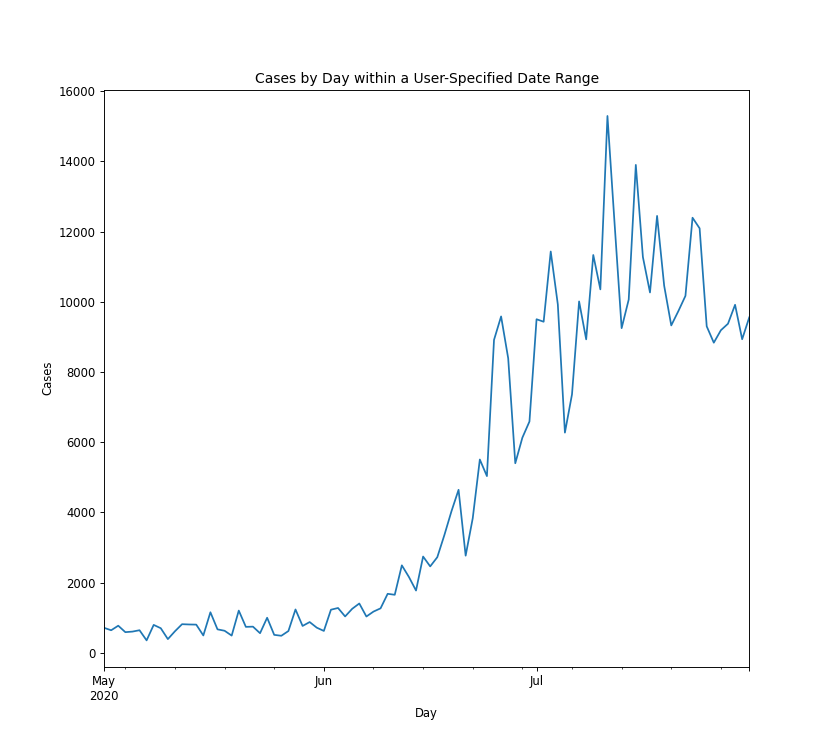

In [17]:
#This function returns the # of cases per day within a user-specified date range.
#date format ("YYYY-MM-DD", "YYYY-MM-DD")
def cases_within_date_range(start, end):
    s = df['Case1']
    count_days = s.where(s.between(start,end,inclusive=True)).value_counts(ascending=True)
    count_days.sort_index(inplace=True)
    print(count_days)
    
    count_days.plot(kind ='line',figsize=(10,9), legend=None)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Cases by Day within a User-Specified Date Range')
    plt.show()
    
cases_within_date_range("2020-5-01", "2020-7-31")


In [18]:
#Percentages of cases by county
count_county_normalized = df['County'].value_counts(ascending=False,normalize=True)
count_county_normalized

Dade            0.229350
Broward         0.107222
Palm Beach      0.064862
Hillsborough    0.058355
Orange          0.056813
                  ...   
Gilchrist       0.000769
Franklin        0.000761
Jefferson       0.000748
Glades          0.000640
Liberty         0.000579
Name: County, Length: 67, dtype: float64

Osceola          21268
Polk             30967
Lee              34177
Pinellas         37387
Duval            49697
Orange           63281
Hillsborough     64999
Palm Beach       72247
Broward         119429
Dade            255462
Name: County, dtype: int64


<IPython.core.display.Javascript object>


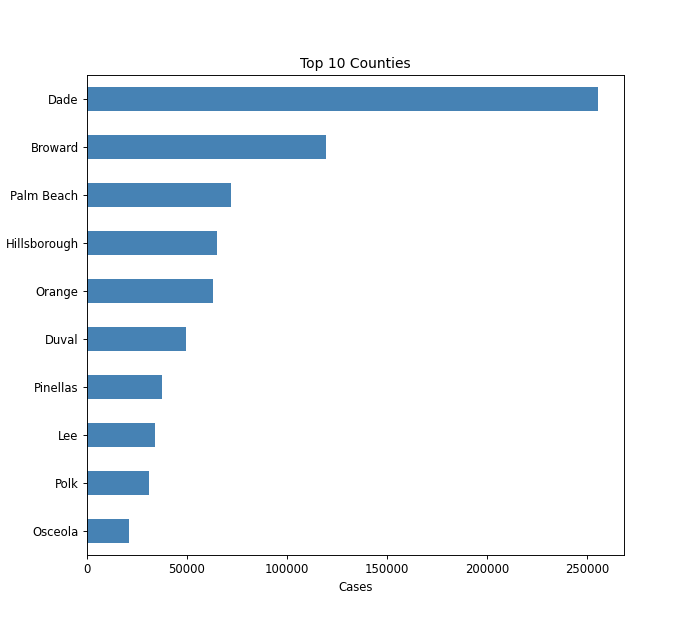

In [19]:
#Top 10 counties: Most cases
def top_10():
    count_county= df['County'].value_counts(ascending=True)
    count_top10_county = count_county.tail(10)
    print(count_top10_county)
        
    count_top10_county.plot(kind='barh', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Cases')
    plt.ylabel('County')
    plt.title('Top 10 Counties')
    plt.show()

top_10()

Liberty       645
Glades        713
Jefferson     833
Franklin      848
Gilchrist     856
Calhoun       983
Dixie         999
Hamilton     1051
Gulf         1137
Union        1302
Name: County, dtype: int64


<IPython.core.display.Javascript object>


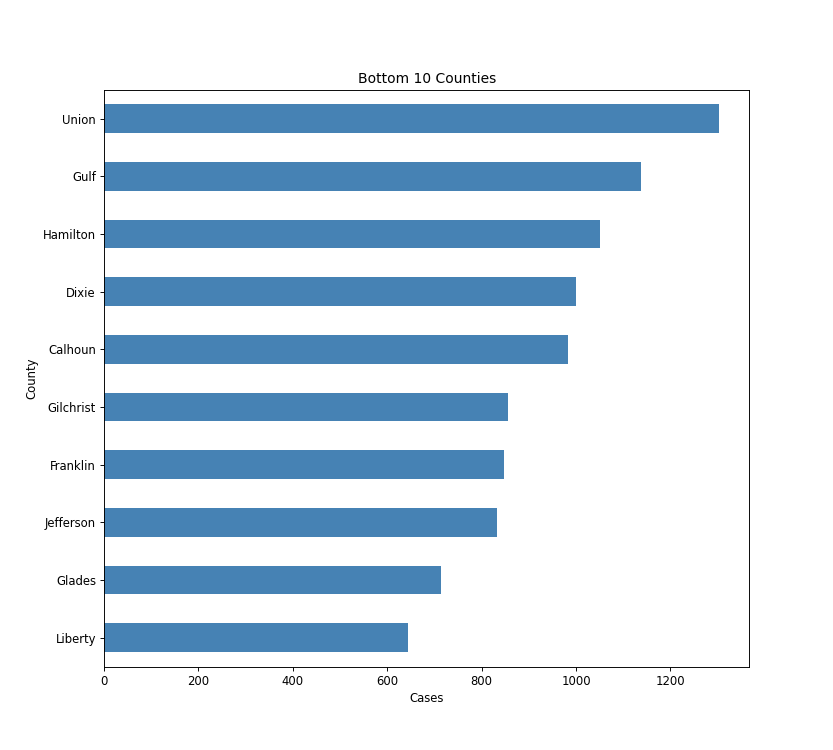

In [20]:
#Bottom 10 counties: Fewest cases
def bottom_10():
    count_county= df['County'].value_counts(ascending=True)
    count_bottom10_county = count_county.head(10)
    print(count_bottom10_county)

    count_bottom10_county.plot(kind ='barh', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Cases')
    plt.ylabel('County')
    plt.title('Bottom 10 Counties')
    plt.show()

bottom_10()

Liberty            645
Glades             713
Jefferson          833
Franklin           848
Gilchrist          856
                 ...  
Orange           63281
Hillsborough     64999
Palm Beach       72247
Broward         119429
Dade            255462
Name: County, Length: 67, dtype: int64


<IPython.core.display.Javascript object>


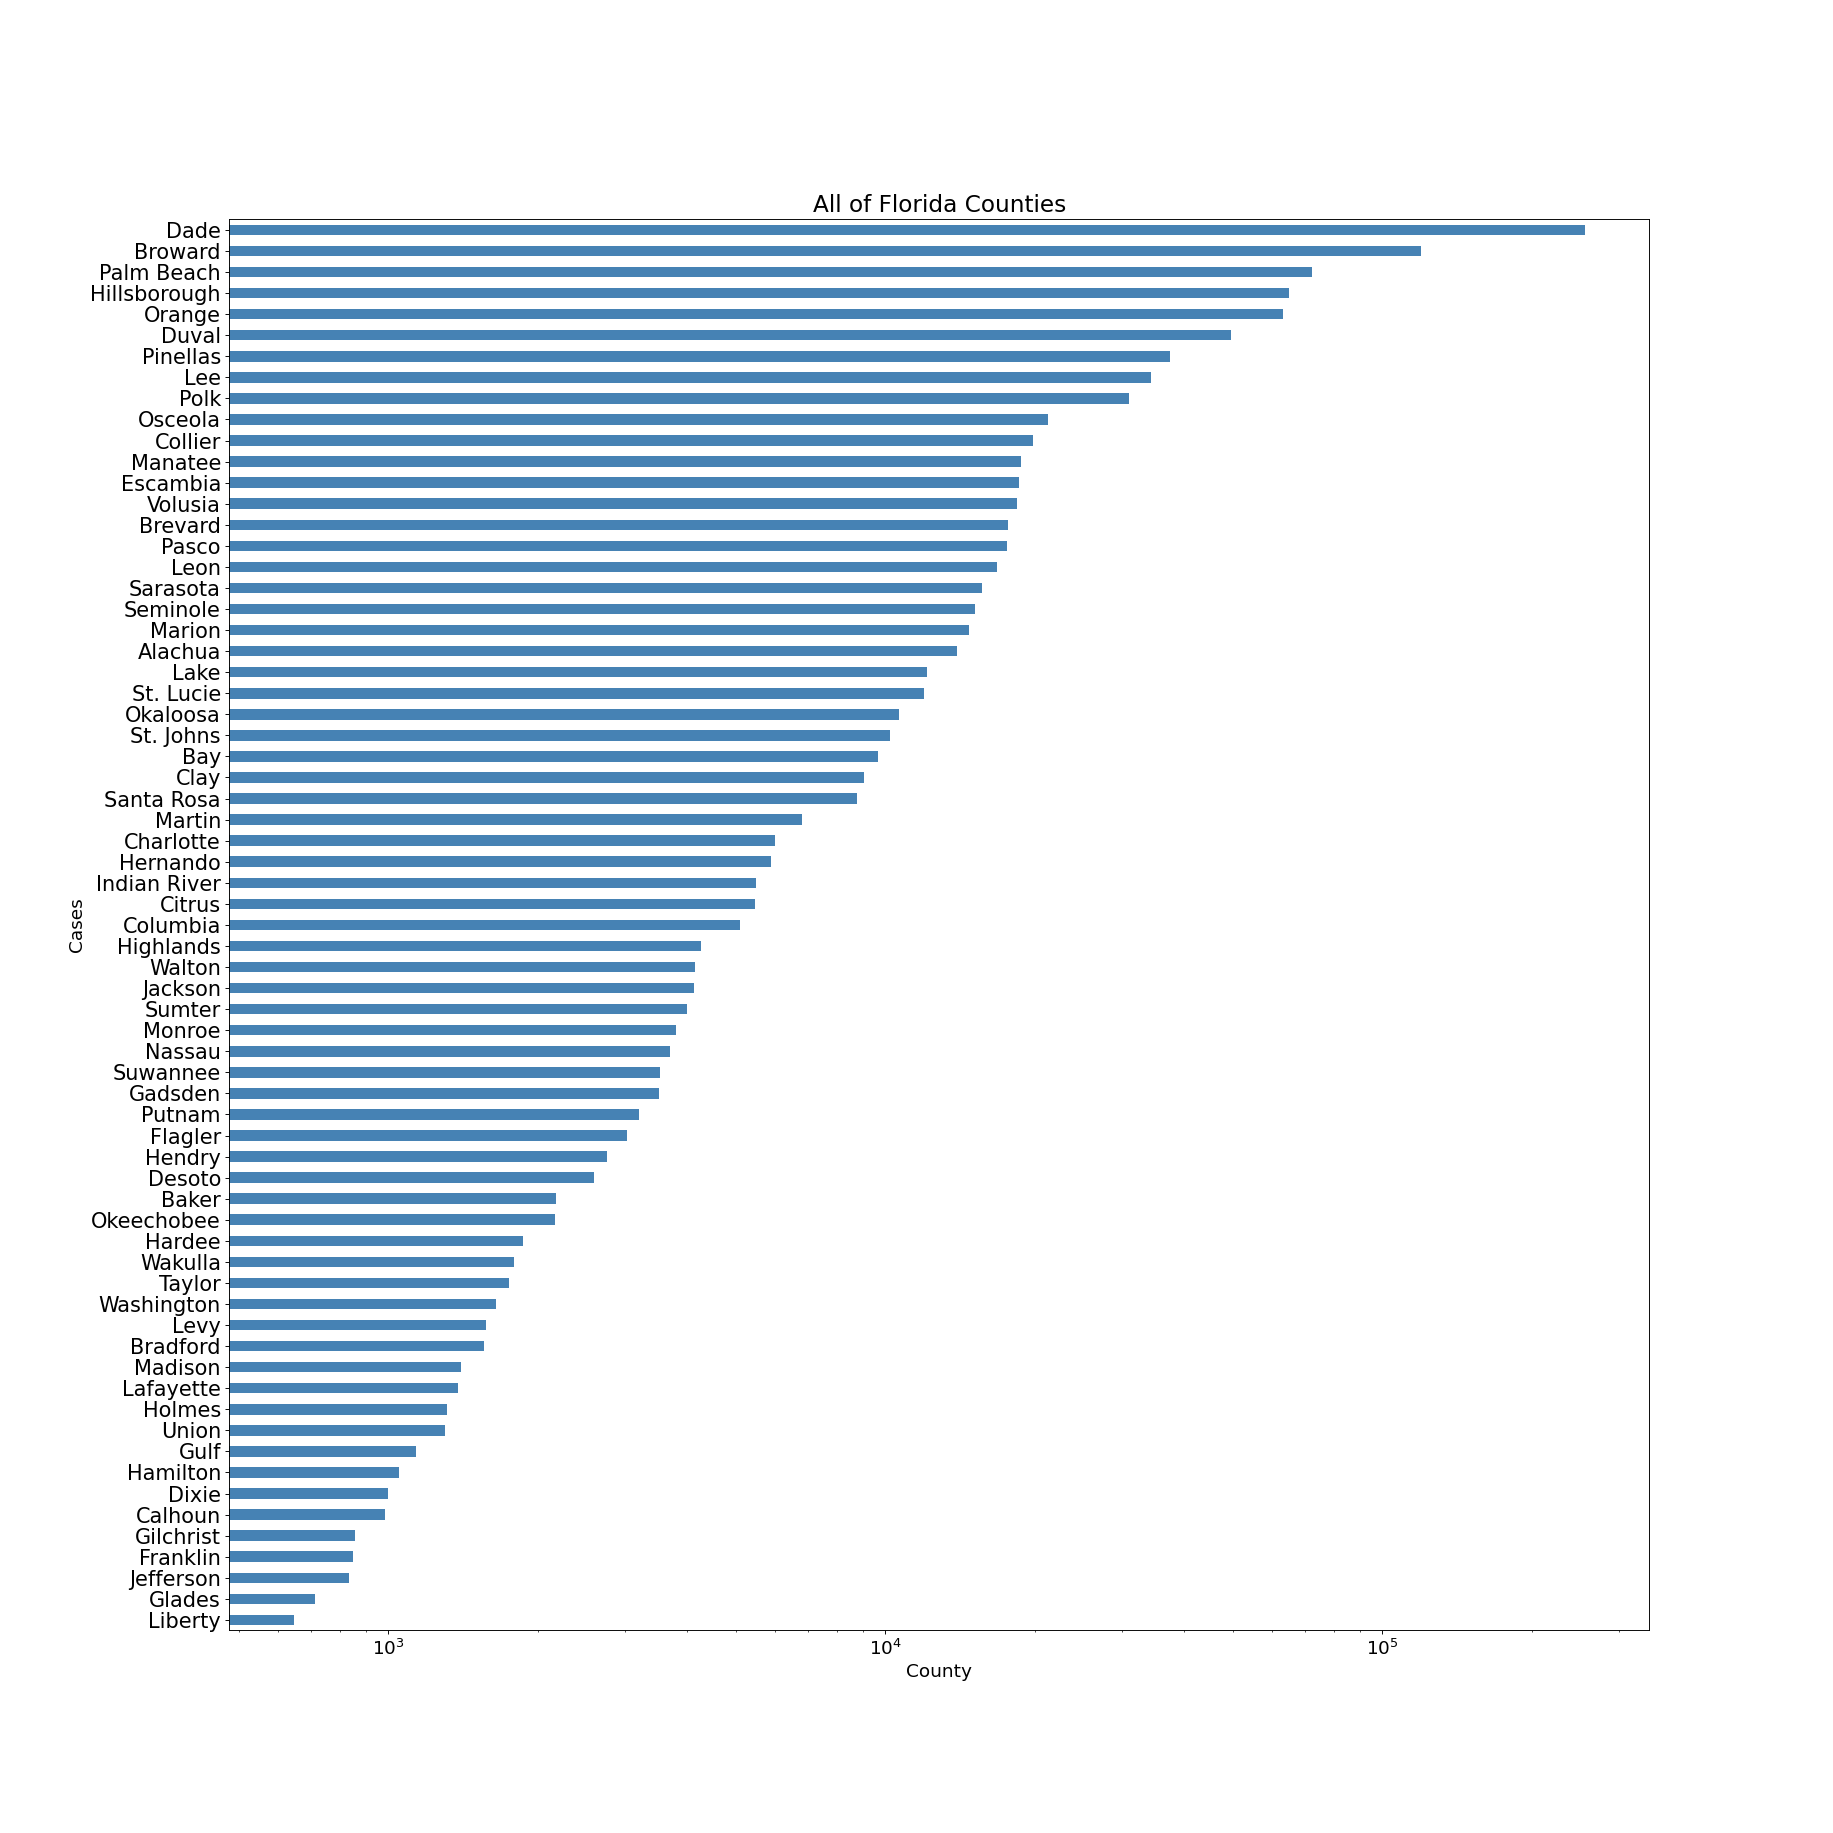

In [21]:
#All counties
count_county= df['County'].value_counts(ascending=True)
count_all_county = count_county
print(count_all_county)

count_all_county.plot(kind ='barh', figsize=(22,22), legend=None, color='steelblue')
plt.xscale("log")
plt.xlabel('County', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Cases', fontsize=16)
plt.yticks(fontsize=18)
plt.title('All of Florida Counties', fontsize=20)
plt.show()

**Florida Regions**
Source: https://www.fasn.net/aboutfasn/regions

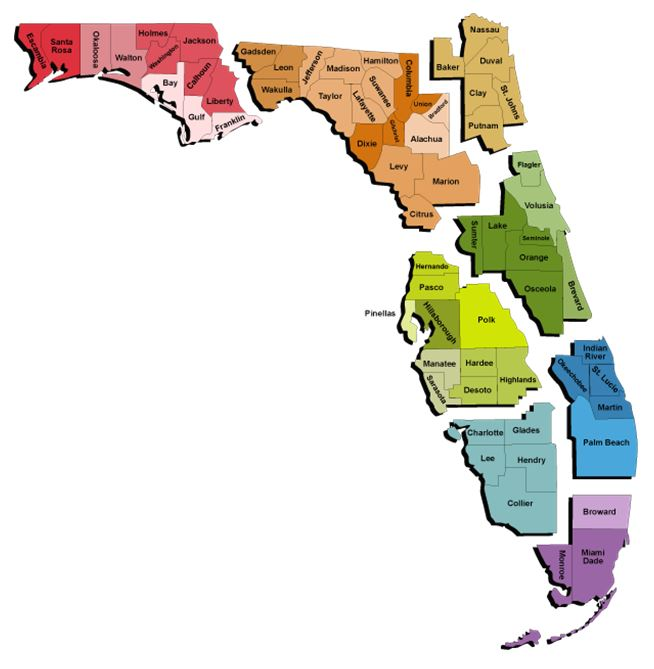

1.0     62531
2.0     77548
3.0     78029
4.0    154921
5.0    199922
6.0     98714
7.0     63499
8.0    378688
Name: Region, dtype: int64


<IPython.core.display.Javascript object>


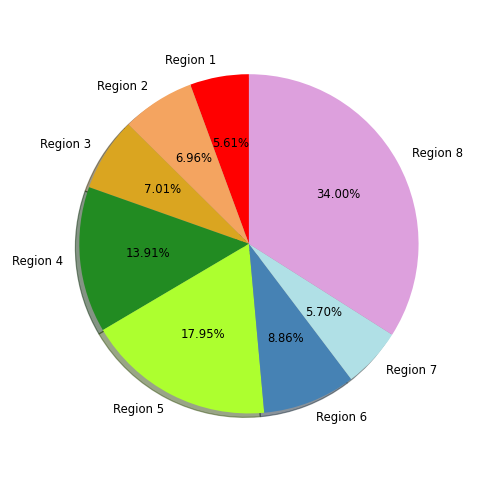

In [22]:
#Percentages of cases by region
#See map above
labels = ['Region 1', 'Region 2', 'Region 3', 'Region 4', 'Region 5', 'Region 6', 'Region 7', 'Region 8']
colors = ['red', 'sandybrown', 'goldenrod', 'forestgreen', 'greenyellow', 'steelblue', 'powderblue', 'plum']

def region():
    count_region= df['Region'].value_counts(sort=False, ascending=False)
    count_region.sort_index(inplace=True)
    print(count_region)
    
    plt.figure(figsize=(7,7))
    plt.pie(count_region, labels=labels, colors=colors, startangle=90, shadow=True, autopct='%1.2f%%')
    plt.axis('equal')
    plt.show()
    
region()

Female     576199
Male       533430
Unknown      7344
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>


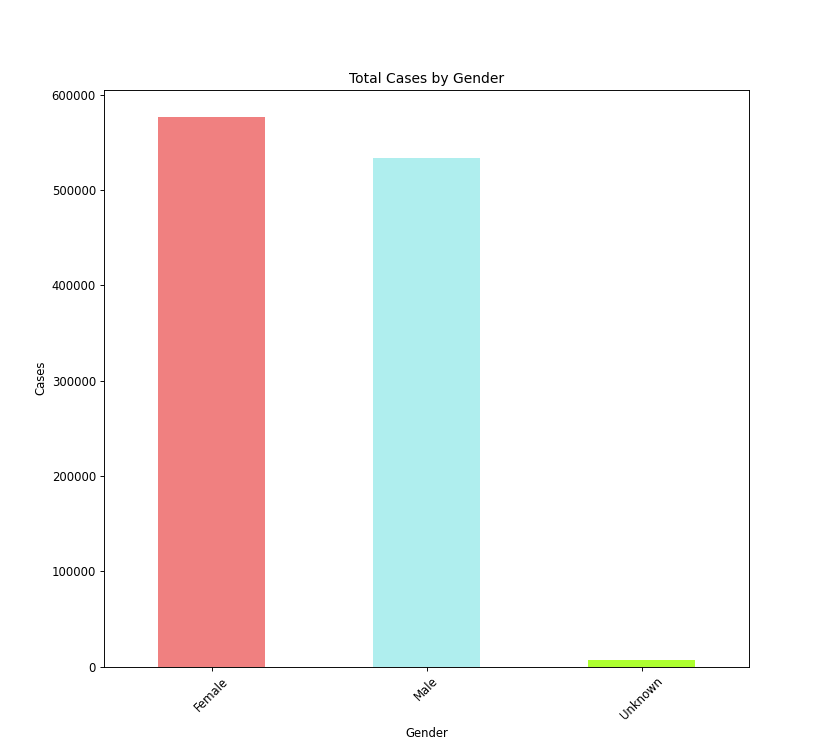

In [23]:
#Total Cases by Gender
colors = ['lightcoral', 'paleturquoise', 'greenyellow']
def gender():
    count_gender= df['Gender'].value_counts(sort=False, ascending=False)
    count_gender.sort_index(inplace=True)
    print(count_gender)
    
    count_gender.plot(kind='bar', figsize=(10,9), legend=None, color=colors)
    plt.xlabel('Gender')
    plt.xticks(rotation=45)
    plt.ylabel('Cases')
    plt.title('Total Cases by Gender')
    plt.show()

gender()

<IPython.core.display.Javascript object>


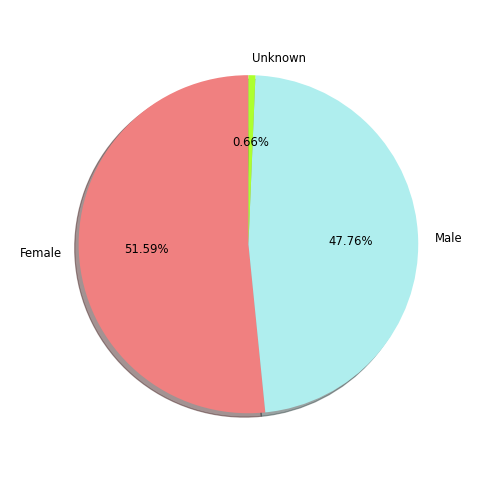

In [24]:
labels = ["Female", "Male", "Unknown"]
colors = ['lightcoral', 'paleturquoise', 'greenyellow']

count_gender= df['Gender'].value_counts(sort=False, ascending=False)
count_gender.sort_index(inplace=True)
plt.figure(figsize=(7,7))
plt.pie(count_gender, labels=labels, colors=colors, startangle=90, shadow=True, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

0-4 years       19454
5-14 years      55781
15-24 years    179475
25-34 years    202902
35-44 years    175033
45-54 years    171559
55-64 years    145484
65-74 years     89757
75-84 years     50421
85+ years       25957
Name: Age_range, dtype: int64


<IPython.core.display.Javascript object>


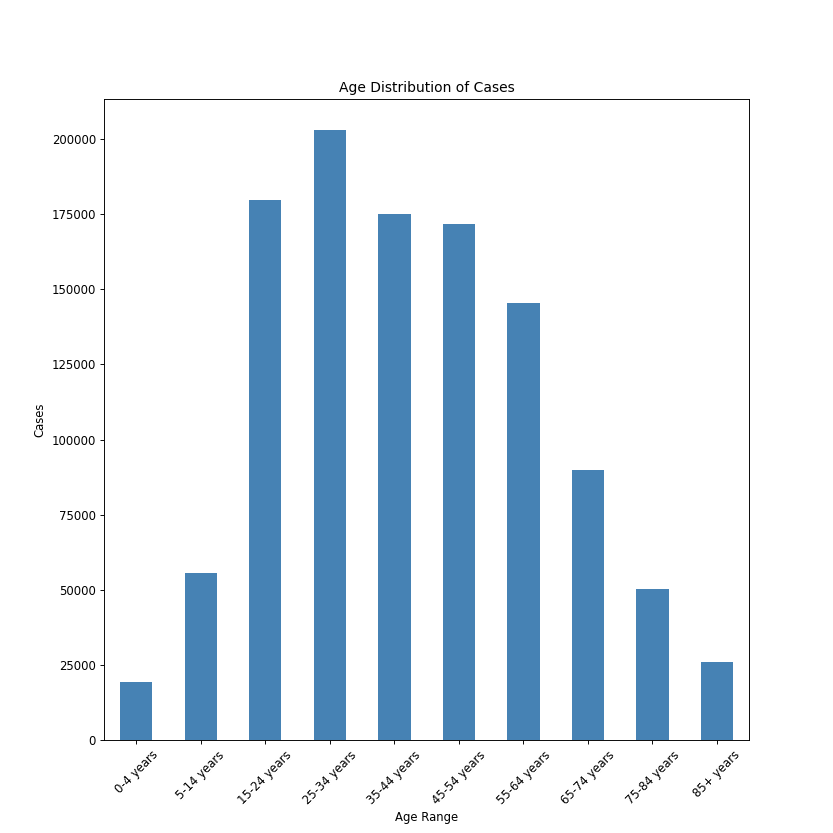

In [25]:
#Age Distribution of Cases
def age_range_total():   
    count_age_range = df['Age_range'].value_counts(sort=True)
    count_age_range.sort_index(inplace=True)
    print(count_age_range)
 
    count_age_range.plot(kind='bar', figsize=(10,10), legend=None, color='steelblue')
    plt.xlabel('Age Range')
    plt.xticks(rotation=45)
    plt.ylabel('Cases')
    plt.title('Age Distribution of Cases')
    plt.show()

age_range_total()


0-4 years       1502
5-14 years      5778
15-24 years    19251
25-34 years    17332
35-44 years    14427
45-54 years    14562
55-64 years    12905
65-74 years     8605
75-84 years     4471
85+ years       1928
Name: Age_range, dtype: int64


<IPython.core.display.Javascript object>


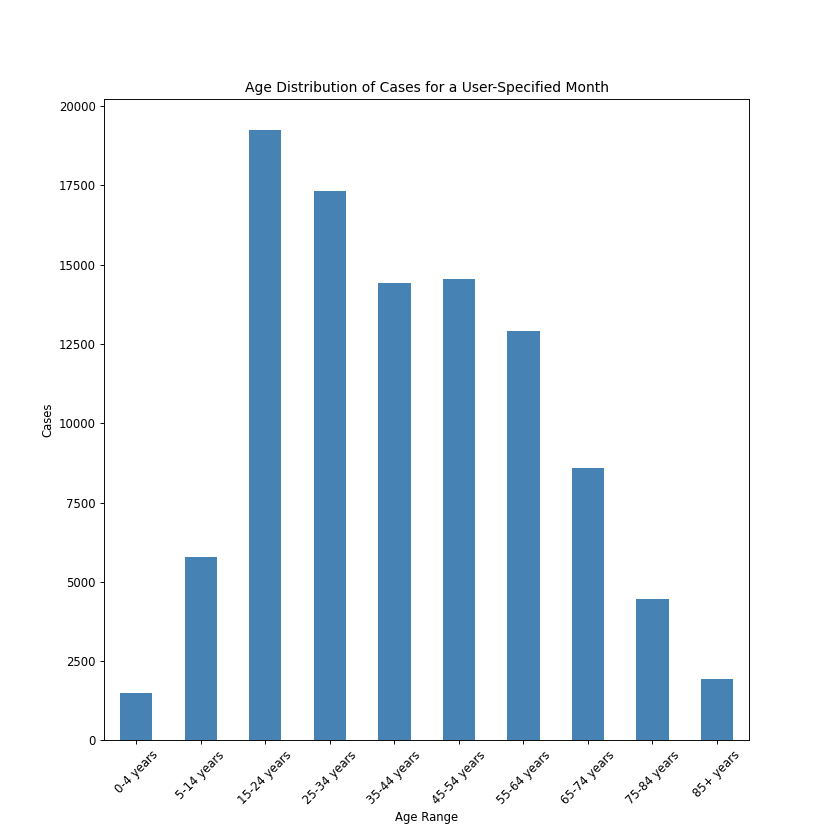

In [26]:
#This function returns the # of cases in each age group during a user-specified month.
def age_range(month):
    specified_month = df["Case1"].dt.month == month
    age_range = df[specified_month].Age_range.value_counts(ascending=True)
    age_range.sort_index(inplace=True)
    print(age_range)
    
    age_range.plot(kind='bar', figsize=(10,10), legend=None, color='steelblue')
    plt.xlabel('Age Range')
    plt.xticks(rotation=45)
    plt.ylabel('Cases')
    plt.title('Age Distribution of Cases for a User-Specified Month')
    plt.show()
    
    
age_range(10)

In [27]:
#Hospitalizations_versus_deaths
df.groupby(['Hospitalized', 'Died']).size().unstack()

Died,Unknown,Yes
Hospitalized,,
No,583151,3009
Unknown,467398,4665
Yes,46375,12375


Yes         58750
Unknown    472063
No         586160
Name: Hospitalized, dtype: int64


<IPython.core.display.Javascript object>


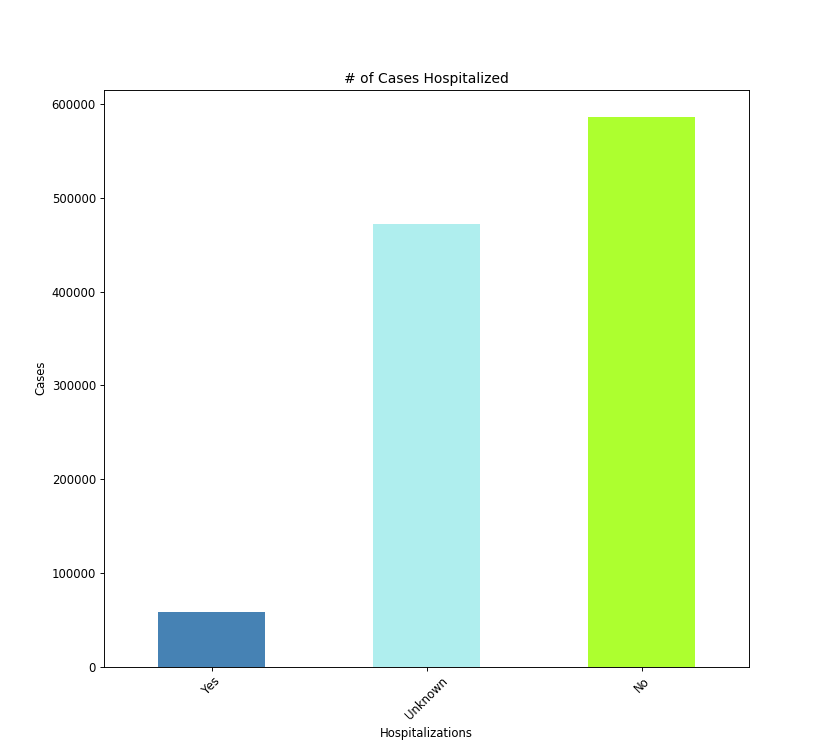

In [28]:
#Total Cases Hospitalized
colors = ['steelblue','paleturquoise','greenyellow']

def hospitalizations():
    count_hospitalization = df['Hospitalized'].value_counts(ascending = True)
    print(count_hospitalization)
    
    count_hospitalization.plot(kind='bar', figsize=(10,9), legend=None, color=colors)
    plt.xlabel('Hospitalizations')
    plt.xticks(rotation=45)
    plt.ylabel('Cases')
    plt.title('# of Cases Hospitalized')
    plt.show()
    
hospitalizations()

<IPython.core.display.Javascript object>


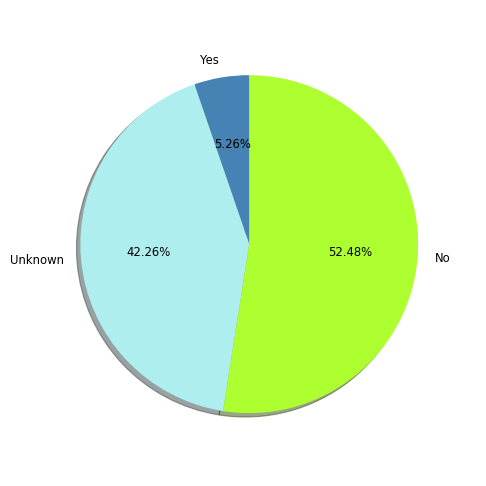

In [29]:
labels = ['Yes', 'Unknown', 'No']
colors = ['steelblue','paleturquoise','greenyellow']

count_hospitalization = df['Hospitalized'].value_counts(ascending = True)
plt.figure(figsize=(7,7))
plt.pie(count_hospitalization, labels=labels, colors=colors, startangle=90, shadow=True, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Hospitalized      No  Unknown    Yes
Case1                               
2020-03-02       1.0      0.0    1.0
2020-03-03       1.0      1.0    0.0
2020-03-04       3.0      0.0    1.0
2020-03-05       0.0      0.0    1.0
2020-03-07       1.0      0.0    3.0
...              ...      ...    ...
2020-12-07    4064.0   3815.0  146.0
2020-12-08    4567.0   4899.0  169.0
2020-12-09    4736.0   6633.0  196.0
2020-12-10    3696.0   7914.0  108.0
2020-12-11    1225.0   9427.0   36.0

[284 rows x 3 columns]


<IPython.core.display.Javascript object>


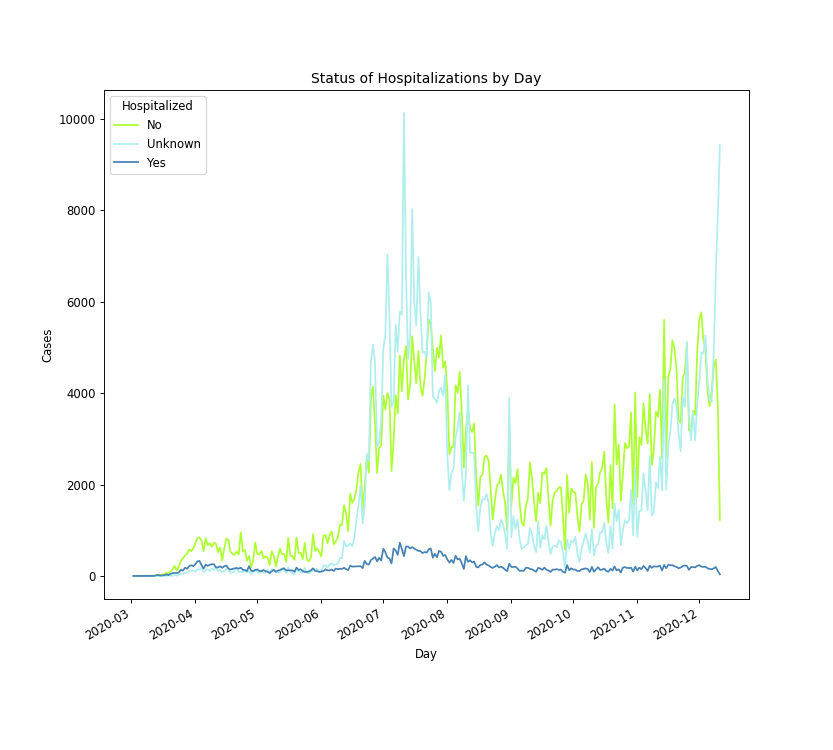

In [30]:
colors = ['greenyellow', 'paleturquoise', 'steelblue']

def status_hospitalizations():
    count_hospitilization = df.groupby('Case1')['Hospitalized'].value_counts(ascending=True).unstack().fillna(0)
    print(count_hospitilization)

    count_hospitilization.plot(kind='line', figsize=(10,9), color=colors)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Status of Hospitalizations by Day')
    plt.show()

status_hospitalizations()

2020-03-02      1
2020-03-04      1
2020-03-05      1
2020-03-07      3
2020-03-09      1
2020-03-10      1
2020-03-12      2
2020-03-13     15
2020-03-14     22
2020-03-15     10
2020-03-16     15
2020-03-17     16
2020-03-18     35
2020-03-19     20
2020-03-20     45
2020-03-21     63
2020-03-22     67
2020-03-23     63
2020-03-24     78
2020-03-25    134
2020-03-26    118
2020-03-27    181
2020-03-28    158
2020-03-29    214
2020-03-30    237
2020-03-31    215
Name: Case1, dtype: int64


<IPython.core.display.Javascript object>


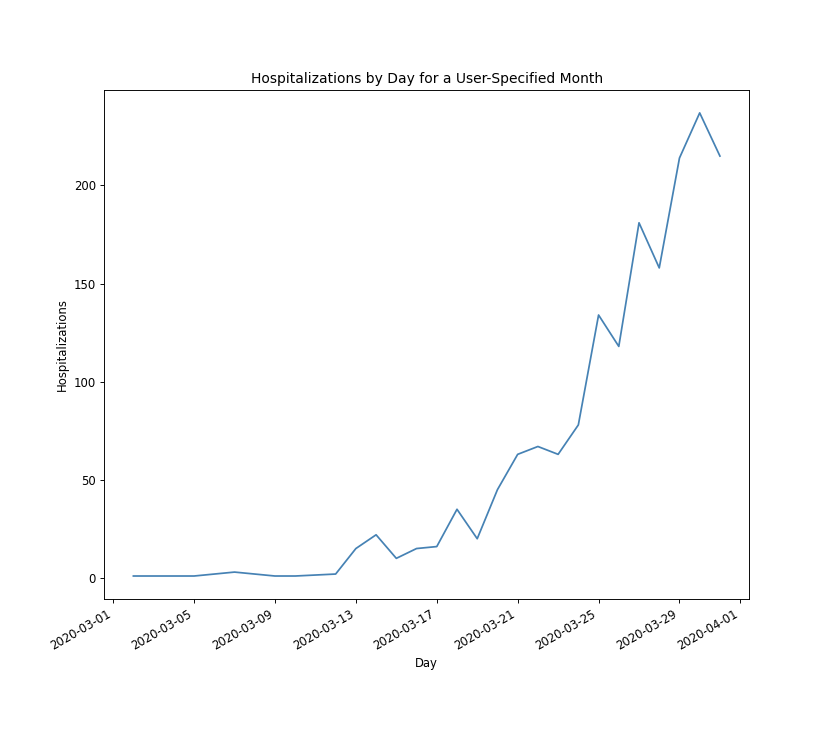

In [31]:
#This function returns the # of hospitalizations per day during a user-specified month.
def hospitalizations_by_day(month):
    hospitalized = df["Hospitalized"] == "Yes"
    df_hospitalized = df[hospitalized]
    count_hospitalized = df_hospitalized["Case1"]
    count_hospitalizations_by_day = count_hospitalized.where(count_hospitalized.dt.month==month).value_counts(ascending=True)
    count_hospitalizations_by_day.sort_index(inplace=True)
    print(count_hospitalizations_by_day)
    
    count_hospitalizations_by_day.plot(kind='line', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Hospitalizations')
    plt.title('Hospitalizations by Day for a User-Specified Month')

hospitalizations_by_day(3)


Yes          20049
Unknown    1096924
Name: Died, dtype: int64


<IPython.core.display.Javascript object>


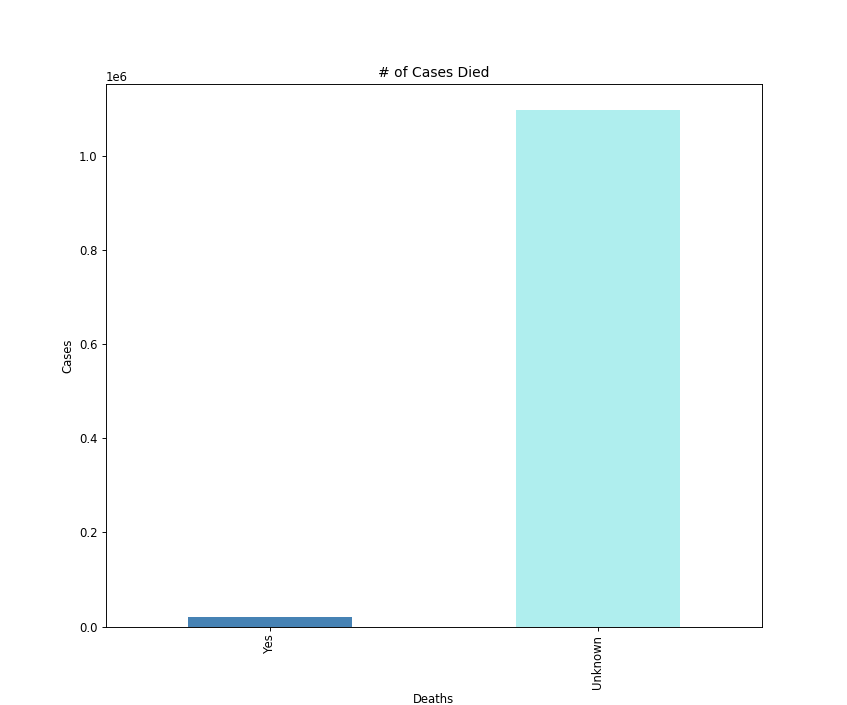

In [32]:
colors = ['steelblue','paleturquoise']

def deaths():
    count_death= df['Died'].value_counts(ascending=True)
    print(count_death)

    count_death.plot(kind='bar', figsize=(10,9), legend=None, color=colors)
    plt.xlabel('Deaths')
    plt.ylabel('Cases')
    plt.title('# of Cases Died')
    plt.show()
    
deaths()

<IPython.core.display.Javascript object>


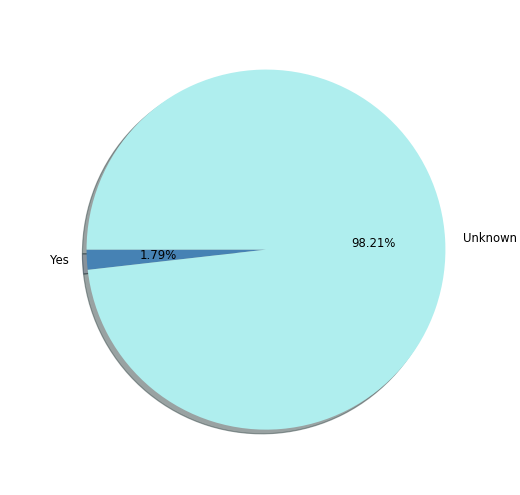

In [33]:
labels = ["Yes", "Unknown"]
colors = ['steelblue', 'paleturquoise']

count_death= df['Died'].value_counts(ascending=True)
plt.figure(figsize=(7,7))
plt.pie(count_death, labels=labels, colors=colors, startangle=180, shadow=True, autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Died        Unknown  Yes
Case1                   
2020-03-02      2.0  0.0
2020-03-03      2.0  0.0
2020-03-04      4.0  0.0
2020-03-05      0.0  1.0
2020-03-07      3.0  1.0
...             ...  ...
2020-12-07   8021.0  4.0
2020-12-08   9630.0  5.0
2020-12-09  11560.0  5.0
2020-12-10  11715.0  3.0
2020-12-11  10688.0  0.0

[284 rows x 2 columns]


<IPython.core.display.Javascript object>


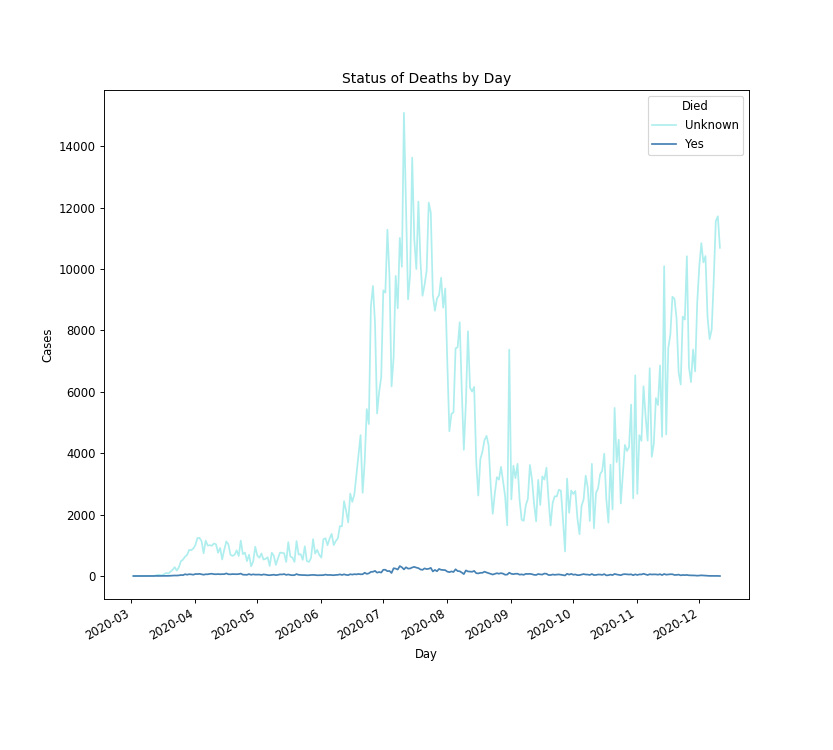

In [34]:
colors = ['paleturquoise', 'steelblue']

def status_deaths():
    count_died = df.groupby('Case1')['Died'].value_counts(ascending=True).unstack().fillna(0)
    print(count_died)
    
    count_died.plot(kind='line', figsize=(10,9), color=colors)
    plt.xlabel('Day')
    plt.ylabel('Cases')
    plt.title('Status of Deaths by Day')
    plt.show()

status_deaths()

2020-11-01    34
2020-11-02    53
2020-11-03    50
2020-11-04    73
2020-11-05    51
2020-11-06    32
2020-11-07    59
2020-11-08    49
2020-11-09    53
2020-11-10    53
2020-11-11    42
2020-11-12    60
2020-11-13    30
2020-11-14    66
2020-11-15    43
2020-11-16    49
2020-11-17    58
2020-11-18    57
2020-11-19    34
2020-11-20    36
2020-11-21    46
2020-11-22    23
2020-11-23    33
2020-11-24    29
2020-11-25    35
2020-11-26    23
2020-11-27    20
2020-11-28    19
2020-11-29    18
2020-11-30    10
Name: Case1, dtype: int64


<IPython.core.display.Javascript object>


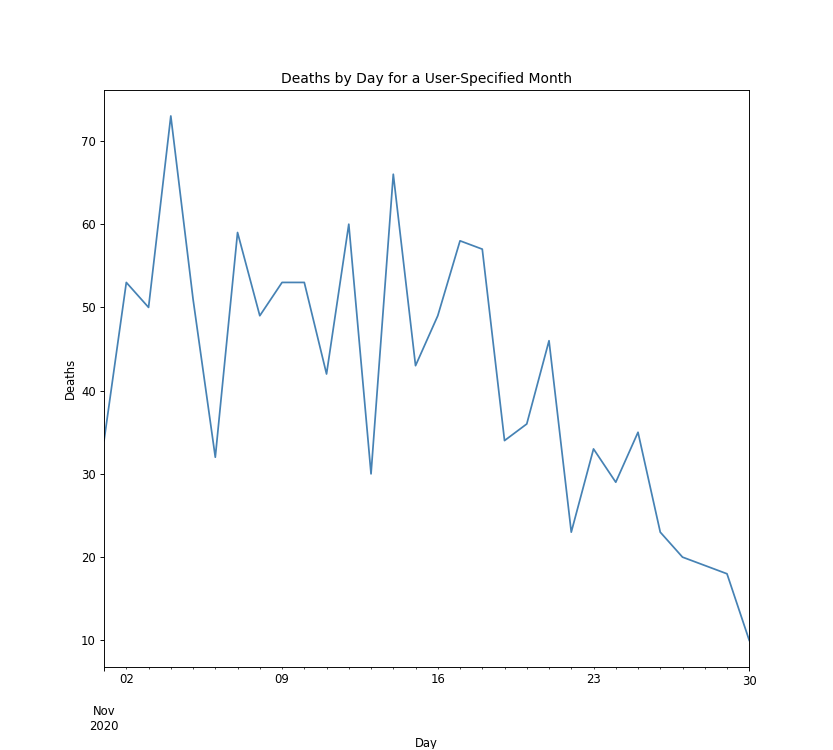

In [35]:
#This function returns the # of deaths per day during a user-specified month.
def deaths_by_day(month):
    died = df["Died"] == "Yes"
    df_died = df[died]
    count_died = df_died["Case1"]
    count_died_by_day = count_died.where(count_died.dt.month==month).value_counts(ascending=True)
    count_died_by_day.sort_index(inplace=True)
    print(count_died_by_day)
    
    count_died_by_day.plot(kind ='line', figsize=(10,9), legend=None, color='steelblue')
    plt.xlabel('Day')
    plt.ylabel('Deaths')
    plt.title('Deaths by Day for a User-Specified Month')

deaths_by_day(11)
